In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Challenge 1

# read in the data:
import pandas as pd
df_1 = pd.read_csv('data files/turnstile_190706.txt')
df_2 = pd.read_csv('data files/turnstile_190713.txt')
df_3 = pd.read_csv('data files/turnstile_190720.txt')
df_4 = pd.read_csv('data files/turnstile_190727.txt')
df_5 = pd.read_csv('data files/turnstile_190803.txt')
df_6 = pd.read_csv('data files/turnstile_190810.txt')
df_7 = pd.read_csv('data files/turnstile_190817.txt')
df_8 = pd.read_csv('data files/turnstile_190824.txt')
df_9 = pd.read_csv('data files/turnstile_190831.txt')

#concatenate
df_combined = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9])

In [3]:
# Column name 'EXITS' needs to be formatted to remove extra spaces
print(df_combined.columns)
df_combined.rename(columns={df_combined.columns[10]:'EXITS'}, inplace=True)
print(df_combined.columns)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')
Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')


In [4]:
# Challenge 2

# What data type did pandas assign values in columns 'Date' and 'Time'?
print(type(df_combined.DATE.iloc[0]), type(df_combined.TIME.iloc[0]))

# Combine 'Date' and 'Time' columns and format into a datetime object
df_combined['DATETIME'] = pd.to_datetime(df_combined['DATE']+ ' ' + df_combined['TIME'])
#df_combined.drop(columns=['DATE','TIME'], inplace=True, axis=1)
print(df_combined.head())

<class 'str'> <class 'str'>
    C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/29/2019  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/29/2019  08:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/29/2019  12:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/29/2019  16:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/29/2019  20:00:00   

      DESC  ENTRIES    EXITS            DATETIME  
0  REGULAR  7116734  2410183 2019-06-29 00:00:00  
1  REGULAR  7116770  2410218 2019-06-29 08:00:00  
2  REGULAR  7116856  2410288 2019-06-29 12:00:00  
3  REGULAR  7117076  2410346 2019-06-29 16:00:00  
4  REGULAR  7117340  2410387 2019-06-29 20:00:00  


Challenge 3

Each row is a turnstile, identified by a combination of the C/A, UNIT, SCP, and STATION columns, with information on entries and exits at that turnstile every n hours. (What is n?) We want total daily entries.
Group the data so that it represents daily entries for each turnstile (hint: pd.groupby or DataFrame.groupby)

In [5]:
df_combined.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,REGULAR,7116734,2410183,2019-06-29 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,08:00:00,REGULAR,7116770,2410218,2019-06-29 08:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,12:00:00,REGULAR,7116856,2410288,2019-06-29 12:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,16:00:00,REGULAR,7117076,2410346,2019-06-29 16:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,20:00:00,REGULAR,7117340,2410387,2019-06-29 20:00:00


In [6]:
# group by turnstile and date, take the first value for each day
turnstiles_daily = (df_combined
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [7]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/29/2019,7116734
1,A002,R051,02-00-00,59 ST,06/30/2019,7117480
2,A002,R051,02-00-00,59 ST,07/01/2019,7118119
3,A002,R051,02-00-00,59 ST,07/02/2019,7119610
4,A002,R051,02-00-00,59 ST,07/03/2019,7121181


In [8]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-8-3a945374269e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [9]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,06/29/2019,7116734,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/30/2019,7117480,06/29/2019,7116734.0
2,A002,R051,02-00-00,59 ST,07/01/2019,7118119,06/30/2019,7117480.0
3,A002,R051,02-00-00,59 ST,07/02/2019,7119610,07/01/2019,7118119.0
4,A002,R051,02-00-00,59 ST,07/03/2019,7121181,07/02/2019,7119610.0


In [10]:
# remove NaN
turnstiles_daily.dropna(subset=['PREV_DATE'],axis=0,inplace=True)

In [11]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/30/2019,7117480,06/29/2019,7116734.0
2,A002,R051,02-00-00,59 ST,07/01/2019,7118119,06/30/2019,7117480.0
3,A002,R051,02-00-00,59 ST,07/02/2019,7119610,07/01/2019,7118119.0
4,A002,R051,02-00-00,59 ST,07/03/2019,7121181,07/02/2019,7119610.0
5,A002,R051,02-00-00,59 ST,07/04/2019,7122652,07/03/2019,7121181.0


In [12]:
# check which stations have turnstiles with fewer entries than the previous day
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A002  R051  02-06-00  59 ST               1
A007  R079  01-05-01  5 AV/59 ST          1
A011  R080  01-03-00  57 ST-7 AV         10
A025  R023  01-03-01  34 ST-HERALD SQ    62
A035  R170  00-00-01  14 ST-UNION SQ      1
                                         ..
R622  R123  00-00-00  FRANKLIN AV        62
R629  R065  00-00-01  ROCKAWAY AV         1
R645  R110  00-03-02  FLATBUSH AV-B.C     2
R646  R110  01-00-01  FLATBUSH AV-B.C    62
R730  R431  00-00-04  EASTCHSTER/DYRE    58
Length: 193, dtype: int64

In [13]:
# If the counter is reversed, make negative values positive
# If difference between days is >= 1 million, set daily entries to min value between entries and prev_ent
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        # print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = 0
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=100000)

In [14]:
mask = (turnstiles_daily["DAILY_ENTRIES"] != 0)
turnstiles_daily = turnstiles_daily[mask]

In [15]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,06/30/2019,7117480,06/29/2019,7116734.0,746.0
2,A002,R051,02-00-00,59 ST,07/01/2019,7118119,06/30/2019,7117480.0,639.0
3,A002,R051,02-00-00,59 ST,07/02/2019,7119610,07/01/2019,7118119.0,1491.0
4,A002,R051,02-00-00,59 ST,07/03/2019,7121181,07/02/2019,7119610.0,1571.0
5,A002,R051,02-00-00,59 ST,07/04/2019,7122652,07/03/2019,7121181.0,1471.0


In [16]:
# This shows which station has the busiest turnstiles
# ...the .mean() function averages across turnstiles for each station
turnstiles_daily.groupby(['STATION']).mean().sort_values('DAILY_ENTRIES', ascending=False)

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
STATION,,,
YORK ST,1.440408e+07,1.440033e+07,3744.134409
MYRTLE AV,1.077464e+07,1.077204e+07,2598.670732
QUEENSBORO PLZ,5.107056e+06,5.104783e+06,2273.626344
JKSN HT-ROOSVLT,5.314900e+06,5.312743e+06,2156.732642
W 4 ST-WASH SQ,7.527960e+06,7.525811e+06,2149.617946
...,...,...,...
E 143/ST MARY'S,9.406565e+05,9.405263e+05,130.153846
TOMPKINSVILLE,3.764417e+05,3.763420e+05,99.657895
BROAD CHANNEL,4.744558e+05,4.743647e+05,91.059140


# Busiest station

In [17]:
# First get sum of all turnstiles at each station for each day
# ...then take the average across all days
# ...this shows the station that has the highest daily average
busiest_stations = turnstiles_daily.groupby(['STATION','DATE']).sum()\
.groupby(['STATION']).mean().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
busiest_stations

,STATION,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,34 ST-PENN STA,3.564472e+09,3.564338e+09,139524.919355
1,GRD CNTRL-42 ST,2.306180e+09,2.306065e+09,120577.370968
2,34 ST-HERALD SQ,4.590620e+09,4.590523e+09,106579.548387
3,23 ST,5.620120e+09,5.620033e+09,93459.790323
4,42 ST-PORT AUTH,7.488436e+09,7.488365e+09,90833.516129
...,...,...,...,...
373,TOMPKINSVILLE,2.076501e+06,2.075951e+06,549.725806
374,BEACH 105 ST,1.470087e+06,1.469625e+06,462.032258
375,NEWARK HM HE,1.597786e+04,1.577160e+04,430.085714
376,BROAD CHANNEL,1.423367e+06,1.423094e+06,273.177419


In [18]:
"""# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())
stations_daily.head(20)

# then get top 20 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top20_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(20))
test_df = (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum())"""

"# first get daily entries by station\nstations_daily = (turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()\n                 .reset_index())\nstations_daily.head(20)\n\n# then get top 20 stations by daily volume \n# (sum across all days is a reasonable way to define this)\ntop20_stations =     (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()\n                   .reset_index()\n                   .sort_values(by='DAILY_ENTRIES',ascending=False) \n                   .STATION.head(20))\ntest_df = (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum())"

# Busiest day of the week

In [19]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,06/30/2019,7117480,06/29/2019,7116734.0,746.0
2,A002,R051,02-00-00,59 ST,07/01/2019,7118119,06/30/2019,7117480.0,639.0
3,A002,R051,02-00-00,59 ST,07/02/2019,7119610,07/01/2019,7118119.0,1491.0
4,A002,R051,02-00-00,59 ST,07/03/2019,7121181,07/02/2019,7119610.0,1571.0
5,A002,R051,02-00-00,59 ST,07/04/2019,7122652,07/03/2019,7121181.0,1471.0


In [20]:
# Convert DATE to datetime object, drop DATE
turnstiles_daily['DATEtime'] = pd.to_datetime(turnstiles_daily['DATE'])
turnstiles_daily.drop(columns=['DATE'], inplace=True, axis=1)

## Busiest day of the summer

In [21]:
# Get the sum of all turnstiles on each day for each station
busiest_single_day = turnstiles_daily.groupby(['STATION','DATEtime']).sum()\
.reset_index().sort_values('DAILY_ENTRIES', ascending=False)
busiest_single_day.head()

,STATION,DATEtime,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
3787,34 ST-PENN STA,2019-07-18,3716582894,3.716504e+09,265362.0
19408,PATH NEW WTC,2019-08-16,2988890,3.056672e+06,189768.0
3780,34 ST-PENN STA,2019-07-11,3716132188,3.715958e+09,178075.0
3781,34 ST-PENN STA,2019-07-12,3716307166,3.716132e+09,177956.0
3792,34 ST-PENN STA,2019-07-23,3717670583,3.717518e+09,177806.0


In [22]:
# Convert Date to day of the week
# Monday=0, Sunday=6
busiest_single_day["dayOfWeek"] = busiest_single_day.DATEtime.dt.dayofweek
busiest_single_day.head()

,STATION,DATEtime,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES,dayOfWeek
3787,34 ST-PENN STA,2019-07-18,3716582894,3.716504e+09,265362.0,3
19408,PATH NEW WTC,2019-08-16,2988890,3.056672e+06,189768.0,4
3780,34 ST-PENN STA,2019-07-11,3716132188,3.715958e+09,178075.0,3
3781,34 ST-PENN STA,2019-07-12,3716307166,3.716132e+09,177956.0,4
3792,34 ST-PENN STA,2019-07-23,3717670583,3.717518e+09,177806.0,1


## Average busiest days of the week

In [23]:
avg_daily = busiest_single_day.groupby(['STATION','dayOfWeek']).mean()\
.sort_values('DAILY_ENTRIES', ascending=False)
avg_daily.head(20)

ENTRIES  PREV_ENTRIES  DAILY_ENTRIES
STATION         dayOfWeek                                           
34 ST-PENN STA  3          3.707343e+09  3.707187e+09  179299.555556
                2          3.718141e+09  3.717974e+09  168977.333333
                1          3.679252e+09  3.679092e+09  165909.444444
                4          3.717864e+09  3.717708e+09  159460.000000
GRD CNTRL-42 ST 3          2.623293e+09  2.623143e+09  157667.666667
                2          2.558454e+09  2.558304e+09  156253.888889
34 ST-PENN STA  5          3.704085e+09  3.703937e+09  150120.625000
GRD CNTRL-42 ST 1          2.627302e+09  2.627158e+09  149209.555556
                4          2.623678e+09  2.623542e+09  143209.777778
                5          2.630418e+09  2.630299e+09  137528.125000
34 ST-HERALD SQ 3          4.617949e+09  4.617834e+09  125895.555556
                2          4.617576e+09  4.617461e+09  125320.777778
23 ST           3          5.655612e+09  5.655506e+09  122763.777778
34 ST-HERALD SQ 1          4.617461e+09  4.617351e+09  121085.666667
                4          4.556140e+09  4.556031e+09  119364.888889
                5          4.546845e+09  4.546737e+09  118189.375000
23 ST           2          5.655412e+09  5.655301e+09  115231.555556
                4          5.655671e+09  5.655566e+09  108966.111111
                1          5.654798e+09  5.654694e+09  108344.222222
TIMES SQ-42 ST  3          5.826175e+09  5.826074e+09  107142.888889

# Busiest time of day

In [160]:
df_combined.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,REGULAR,7116734,2410183,2019-06-29 00:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,08:00:00,REGULAR,7116770,2410218,2019-06-29 08:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,12:00:00,REGULAR,7116856,2410288,2019-06-29 12:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,16:00:00,REGULAR,7117076,2410346,2019-06-29 16:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,20:00:00,REGULAR,7117340,2410387,2019-06-29 20:00:00


In [161]:
df_combined.reset_index(inplace=True)

In [162]:
top_stations_list = busiest_stations['STATION'][0:30]
top_stations = df_combined[df_combined['STATION'].isin(top_stations_list)]

In [163]:
top_stations[["PREV_TIME", "PREV_ENTRIES", "PREV_EXITS"]] = (\
top_stations.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])["TIME", "ENTRIES", "EXITS"]\
.apply(lambda grp: grp.shift(1)))

<ipython-input-163-700b53ec150b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_stations.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])["TIME", "ENTRIES", "EXITS"]\
/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [164]:
top_stations.head(6)

,level_0,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,PREV_TIME,PREV_ENTRIES,PREV_EXITS
0,0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,REGULAR,7116734,2410183,2019-06-29 00:00:00,NaN,NaN,NaN
1,1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,08:00:00,REGULAR,7116770,2410218,2019-06-29 08:00:00,00:00:00,7116734.0,2410183.0
2,2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,12:00:00,REGULAR,7116856,2410288,2019-06-29 12:00:00,08:00:00,7116770.0,2410218.0
3,3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,16:00:00,REGULAR,7117076,2410346,2019-06-29 16:00:00,12:00:00,7116856.0,2410288.0
4,4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,20:00:00,REGULAR,7117340,2410387,2019-06-29 20:00:00,16:00:00,7117076.0,2410346.0
5,5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,00:00:00,REGULAR,7117480,2410406,2019-06-30 00:00:00,NaN,NaN,NaN


In [165]:
# remove rows that have NaN
top_stations.dropna(subset=['PREV_TIME'],axis=0,inplace=True)
top_stations.head()

<ipython-input-165-b538bf50f155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stations.dropna(subset=['PREV_TIME'],axis=0,inplace=True)


,level_0,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,PREV_TIME,PREV_ENTRIES,PREV_EXITS
1,1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,08:00:00,REGULAR,7116770,2410218,2019-06-29 08:00:00,00:00:00,7116734.0,2410183.0
2,2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,12:00:00,REGULAR,7116856,2410288,2019-06-29 12:00:00,08:00:00,7116770.0,2410218.0
3,3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,16:00:00,REGULAR,7117076,2410346,2019-06-29 16:00:00,12:00:00,7116856.0,2410288.0
4,4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,20:00:00,REGULAR,7117340,2410387,2019-06-29 20:00:00,16:00:00,7117076.0,2410346.0
6,6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,04:00:00,REGULAR,7117508,2410415,2019-06-30 04:00:00,00:00:00,7117480.0,2410406.0


In [168]:
# change fields to DATETIME objects
top_stations['dtDATE'] = pd.to_datetime(top_stations['DATE'])
top_stations['dtTIME'] = pd.to_datetime(top_stations['TIME'], format="%H:%M:%S").dt.time
top_stations['dtPREV_TIME'] = pd.to_datetime(top_stations['PREV_TIME'], format="%H:%M:%S").dt.time
top_stations.head()

<ipython-input-168-40faa593a24a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stations['dtDATE'] = pd.to_datetime(top_stations['DATE'])
<ipython-input-168-40faa593a24a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stations['dtTIME'] = pd.to_datetime(top_stations['TIME'], format="%H:%M:%S").dt.time
<ipython-input-168-40faa593a24a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,level_0,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,PREV_TIME,PREV_ENTRIES,PREV_EXITS,dtDATE,dtTIME,dtPREV_TIME
1,1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,08:00:00,REGULAR,7116770,2410218,2019-06-29 08:00:00,00:00:00,7116734.0,2410183.0,2019-06-29,08:00:00,00:00:00
2,2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,12:00:00,REGULAR,7116856,2410288,2019-06-29 12:00:00,08:00:00,7116770.0,2410218.0,2019-06-29,12:00:00,08:00:00
3,3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,16:00:00,REGULAR,7117076,2410346,2019-06-29 16:00:00,12:00:00,7116856.0,2410288.0,2019-06-29,16:00:00,12:00:00
4,4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,20:00:00,REGULAR,7117340,2410387,2019-06-29 20:00:00,16:00:00,7117076.0,2410346.0,2019-06-29,20:00:00,16:00:00
6,6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/30/2019,04:00:00,REGULAR,7117508,2410415,2019-06-30 04:00:00,00:00:00,7117480.0,2410406.0,2019-06-30,04:00:00,00:00:00


In [169]:
# drop unnecessary columns
top_stations.drop(columns=['index','LINENAME','DIVISION','DESC','DATETIME','DATE','TIME','PREV_TIME'], inplace=True, axis=1)
top_stations.head()

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,level_0,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,dtDATE,dtTIME,dtPREV_TIME
1,1,A002,R051,02-00-00,59 ST,7116770,2410218,7116734.0,2410183.0,2019-06-29,08:00:00,00:00:00
2,2,A002,R051,02-00-00,59 ST,7116856,2410288,7116770.0,2410218.0,2019-06-29,12:00:00,08:00:00
3,3,A002,R051,02-00-00,59 ST,7117076,2410346,7116856.0,2410288.0,2019-06-29,16:00:00,12:00:00
4,4,A002,R051,02-00-00,59 ST,7117340,2410387,7117076.0,2410346.0,2019-06-29,20:00:00,16:00:00
6,6,A002,R051,02-00-00,59 ST,7117508,2410415,7117480.0,2410406.0,2019-06-30,04:00:00,00:00:00


In [170]:
top_stations['calcENTRIES'] = top_stations['ENTRIES'] - top_stations['PREV_ENTRIES']
top_stations['calcEXITS'] = top_stations['EXITS'] - top_stations['PREV_EXITS']

<ipython-input-170-bc3ea485cc9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stations['calcENTRIES'] = top_stations['ENTRIES'] - top_stations['PREV_ENTRIES']
<ipython-input-170-bc3ea485cc9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stations['calcEXITS'] = top_stations['EXITS'] - top_stations['PREV_EXITS']


In [171]:
top_stations.head()

,level_0,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,dtDATE,dtTIME,dtPREV_TIME,calcENTRIES,calcEXITS
1,1,A002,R051,02-00-00,59 ST,7116770,2410218,7116734.0,2410183.0,2019-06-29,08:00:00,00:00:00,36.0,35.0
2,2,A002,R051,02-00-00,59 ST,7116856,2410288,7116770.0,2410218.0,2019-06-29,12:00:00,08:00:00,86.0,70.0
3,3,A002,R051,02-00-00,59 ST,7117076,2410346,7116856.0,2410288.0,2019-06-29,16:00:00,12:00:00,220.0,58.0
4,4,A002,R051,02-00-00,59 ST,7117340,2410387,7117076.0,2410346.0,2019-06-29,20:00:00,16:00:00,264.0,41.0
6,6,A002,R051,02-00-00,59 ST,7117508,2410415,7117480.0,2410406.0,2019-06-30,04:00:00,00:00:00,28.0,9.0


In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

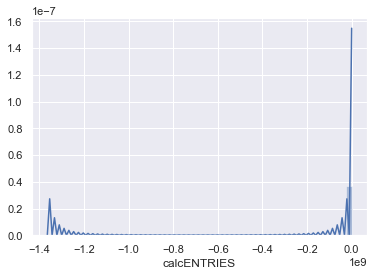

In [173]:
sns.distplot(top_stations['calcENTRIES']
             [top_stations['calcENTRIES'] < 50000])

In [177]:
top_stations.head()

,level_0,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,dtDATE,dtTIME,dtPREV_TIME,calcENTRIES,calcEXITS
1,1,A002,R051,02-00-00,59 ST,7116770,2410218,7116734.0,2410183.0,2019-06-29,08:00:00,00:00:00,36.0,35.0
2,2,A002,R051,02-00-00,59 ST,7116856,2410288,7116770.0,2410218.0,2019-06-29,12:00:00,08:00:00,86.0,70.0
3,3,A002,R051,02-00-00,59 ST,7117076,2410346,7116856.0,2410288.0,2019-06-29,16:00:00,12:00:00,220.0,58.0
4,4,A002,R051,02-00-00,59 ST,7117340,2410387,7117076.0,2410346.0,2019-06-29,20:00:00,16:00:00,264.0,41.0
6,6,A002,R051,02-00-00,59 ST,7117508,2410415,7117480.0,2410406.0,2019-06-30,04:00:00,00:00:00,28.0,9.0


In [180]:
top_stations['calcENTRIES'].min()

0.0

In [179]:
# if counter was reversed, some values are negative
# take the absolute value of counts
top_stations['calcENTRIES'] = abs(top_stations['calcENTRIES'])
top_stations['calcEXITS'] = abs(top_stations['calcEXITS'])

<ipython-input-179-daece4bf2756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stations['calcENTRIES'] = abs(top_stations['calcENTRIES'])


In [221]:
top_stations['calcENTRIES'].quantile(.9998)

2628.0435999999754

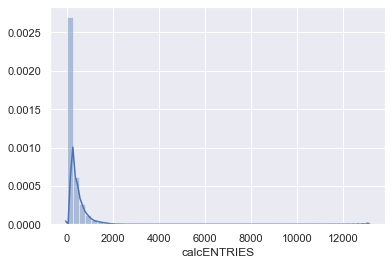

In [192]:
sns.distplot(top_stations['calcENTRIES'][top_stations['calcENTRIES'] < 20000])

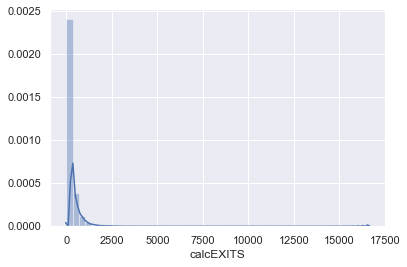

In [193]:
sns.distplot(top_stations['calcEXITS'][top_stations['calcEXITS'] < 20000])

In [212]:
# Filter Entries and Exits for high counts
mask = ((top_stations['calcENTRIES'] < 10000) & (top_stations['calcEXITS'] < 10000))
top_stations = top_stations[mask]

,level_0,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,dtDATE,dtTIME,dtPREV_TIME,calcENTRIES,calcEXITS
1,1,A002,R051,02-00-00,59 ST,7116770,2410218,7116734.0,2410183.0,2019-06-29,08:00:00,00:00:00,36.0,35.0
2,2,A002,R051,02-00-00,59 ST,7116856,2410288,7116770.0,2410218.0,2019-06-29,12:00:00,08:00:00,86.0,70.0
6,6,A002,R051,02-00-00,59 ST,7117508,2410415,7117480.0,2410406.0,2019-06-30,04:00:00,00:00:00,28.0,9.0
7,7,A002,R051,02-00-00,59 ST,7117523,2410431,7117508.0,2410415.0,2019-06-30,08:00:00,04:00:00,15.0,16.0
8,8,A002,R051,02-00-00,59 ST,7117610,2410486,7117523.0,2410431.0,2019-06-30,12:00:00,08:00:00,87.0,55.0
12,12,A002,R051,02-00-00,59 ST,7118127,2410591,7118119.0,2410590.0,2019-07-01,04:00:00,00:00:00,8.0,1.0
18,18,A002,R051,02-00-00,59 ST,7119626,2411001,7119610.0,2410993.0,2019-07-02,04:00:00,00:00:00,16.0,8.0
19,19,A002,R051,02-00-00,59 ST,7119670,2411085,7119626.0,2411001.0,2019-07-02,08:00:00,04:00:00,44.0,84.0
24,24,A002,R051,02-00-00,59 ST,7121197,2411472,7121181.0,2411468.0,2019-07-03,04:00:00,00:00:00,16.0,4.0


In [224]:
top_stations['TOTAL'] = top_stations['calcENTRIES'] + top_stations['calcEXITS']
top_stations.drop(columns=['ENTRIES','EXITS','PREV_ENTRIES','PREV_EXITS','calcENTRIES','calcEXITS'], inplace=True, axis=1)

<ipython-input-224-8cbd28d3339f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stations['TOTAL'] = top_stations['calcENTRIES'] + top_stations['calcEXITS']


In [228]:
top_stations.head()

,level_0,C/A,UNIT,SCP,STATION,dtDATE,dtTIME,dtPREV_TIME,TOTAL
1,1,A002,R051,02-00-00,59 ST,2019-06-29,08:00:00,00:00:00,71.0
2,2,A002,R051,02-00-00,59 ST,2019-06-29,12:00:00,08:00:00,156.0
3,3,A002,R051,02-00-00,59 ST,2019-06-29,16:00:00,12:00:00,278.0
4,4,A002,R051,02-00-00,59 ST,2019-06-29,20:00:00,16:00:00,305.0
6,6,A002,R051,02-00-00,59 ST,2019-06-30,04:00:00,00:00:00,37.0


In [ ]:
moviesPerDayRated = turnstiles_daily.groupby("dayOfWeek").Rating.size()
print(moviesPerDayRated[moviesPerDayRated==moviesPerDayRated.max()])

In [ ]:
# find busiest hour within subset of hours (times < 06:00 and times >21:00)

# Sum Entries and Exits

# Do we still have high negative and positive counts?
#   are there ways to clean this data?

#
#   Step 1 what are the busiest stations?
#

# group by station, get sum
station_df = df_combined.groupby(["STATION", "DATETIME"]).sum().diff(axis=0).fillna(0)

# group by station, get mean
station_df = df_combined.groupby(["STATION", "DATETIME"]).mean().diff(axis=0).fillna(0)

# look at SD to understand how variable values are at each station

# bar chart - all
# bar chart - top ~30?


#
#   Step 2 what stations are most important to the client?
#

# Census data: residential/ tourist/ income

# Visualize relevant neighborhoods with NYC map

# bar chart - top ~30 highlight/ gray-out

# conclusions about recommended stations for canvasing


#
#   Step 3 break down stations by busiest hour to refine recommendation about when to canvas
#

# focus on the short list of prioritized stations

# write OR statement to include times in 8a-12p and 9a-1p (8a-1p)